In [ ]:
import numpy as np
import csv
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, mean_squared_error, hinge_loss

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [ ]:
#/content/drive/MyDrive/DRED.csv
from google.colab import drive
drive.mount('/content/drive')
import os
path = "./content/drive/MyDrive/DRED.csv"


def classifer_metrics(y_true, y_pred):
    classifer_accuracy = accuracy_score(y_true, y_pred)*100
    classifier_f1_score = f1_score(y_true, y_pred, average='macro')*100
    return classifer_accuracy, classifier_f1_score

def plot_roc_curve(y_true, y_pred):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')


# This line reads the dataset names instead of hardcoding them.
datasets = os.listdir('/content/drive/MyDrive/datasets')
#dataset = pd.read_csv(path)
iterations = 1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


------------- DRED Execution -------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Dataset Size: (166353, 6)

Accuracy: 0.9902317333413483
mse: 0.11114784647290434
Training Time_1: --- 63.3464 seconds ---
Training Accuracy_1: --- 99.11%
Training F1 Score_1: --- 98.25%
Testing Time_1: --- 12.3603 seconds ---
Testing Accuracy_1: --- 99.02%
Testing F1 Score_1: --- 97.96%
----------------------------------------------


Average Training Time: --- 63.3464 seconds ---
Average Training Accuracy: --- 99.11%
Average Training F1 Score: --- 98.25%
Average Testing Time: --- 12.3603 seconds ---
Average Testing Accuracy: --- 99.02%
Average Testing F1 Score: --- 97.96%

Confusion matrix
[[ 9036     0     0     0   146]
 [   50   642     0     0     0]
 [   30     0   601     0    19]
 [   17     0     0  6965     3]
 [   60     0     0     0 15702]]


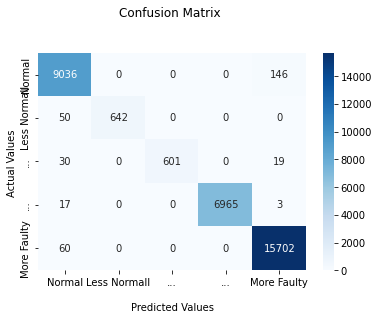

----------------------------------------------

------------- DRED Summary -------------
Training Time_1: --- 63.3464 seconds ---
Training Accuracy_1: --- 99.11%
Training F1 Score_1: --- 98.25%
Testing Time_1: --- 12.3603 seconds ---
Testing Accuracy_1: --- 99.02%
Testing F1 Score_1: --- 97.96%
----------------------------------------------


Average Training Time: --- 63.3464 seconds ---
Average Training Accuracy: --- 99.11%
Average Training F1 Score: --- 98.25%
Average Testing Time: --- 12.3603 seconds ---
Average Testing Accuracy: --- 99.02%
Average Testing F1 Score: --- 97.96%



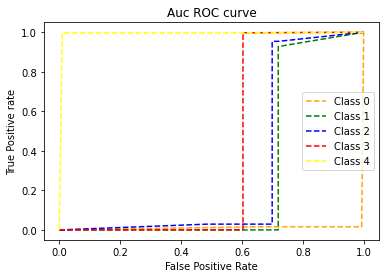

In [ ]:
#KNN
training_time_KNN = {k:[] for k in datasets}
training_accuracy_KNN = {k:[] for k in datasets}
training_f1_score_KNN = {k:[] for k in datasets}
testing_time_KNN = {k:[] for k in datasets}
testing_accuracy_KNN = {k:[] for k in datasets}
testing_f1_score_KNN = {k:[] for k in datasets}


for dataset in datasets:
    print(f"------------- {dataset[:-4]} Execution -------------")
    with open(f'/content/drive/MyDrive/datasets/{dataset}','r') as csv_file:
        csv_reader = csv.reader(csv_file)
        data = list(csv_reader)

    data = np.array(data)
    data = data.astype(np.float)
        
    num_observations = data.shape[0]
    num_features = data.shape[1] - 1

    print(f"Dataset Size: {data.shape}\n")

    for i in range(iterations):
         # Shuffle the data
        shuffle_idx = np.random.permutation(num_observations)
        shuffled_data = data[shuffle_idx,:]

        X = shuffled_data[:,:-1]
        Y = shuffled_data[:,-1]

             
        le = LabelEncoder()
        Y = le.fit_transform(Y)

        # Split the data for training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 0)
        """
        def recall(y_true, y_pred):
            true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
            possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
            recall = true_positives / (possible_positives + K.epsilon())
            return recall

        def precision(y_true, y_pred):
            true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
            predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
            precision = true_positives / (predicted_positives + K.epsilon())
            return precision


        def f1_score(y_true, y_pred):
            precision_m = precision(y_true, y_pred)
            recall_m = recall(y_true, y_pred)
            return 2*((precision_m*recall_m)/(precision_m+recall_m+K.epsilon()))"""
            

       
        # Instantiate learning model (k = 5)
        classifier = KNeighborsClassifier(n_neighbors=500)

        # Fitting the model
        training_time_start = time.time()

        classifier.fit(X_train, y_train)
        y_train_pred = classifier.predict(X_train)
        classifir_accuracy, classifier_f1_score = classifer_metrics(y_train, y_train_pred)
        training_accuracy_KNN[dataset].append(classifir_accuracy)
        training_f1_score_KNN[dataset].append(classifier_f1_score)

        training_time_end = time.time()
        training_time_KNN[dataset].append(training_time_end - training_time_start)

        # Predicting the Test set results
        testing_time_start = time.time()
        
        y_test_pred = classifier.predict(X_test)
        classifir_accuracy, classifier_f1_score = classifer_metrics(y_test, y_test_pred)
        testing_accuracy_KNN[dataset].append(classifir_accuracy)
        testing_f1_score_KNN[dataset].append(classifier_f1_score)
        
        testing_time_end = time.time()
        testing_time_KNN[dataset].append(testing_time_end - testing_time_start)  
        
              

        print("Accuracy:", accuracy_score(y_test, y_test_pred))
        print("mse:", mean_squared_error(y_test, y_test_pred))
        #print("loss:", hinge_loss(y_test, y_test_pred))

        classifier_confusion_matrix = confusion_matrix(y_test, y_test_pred)

        

         
        print(f"Training Time_{i+1}: --- {training_time_KNN[dataset][i]:.4f} seconds ---")
        print(f"Training Accuracy_{i+1}: --- {training_accuracy_KNN[dataset][i]:.2f}%")
        print(f"Training F1 Score_{i+1}: --- {training_f1_score_KNN[dataset][i]:.2f}%")
        print(f"Testing Time_{i+1}: --- {testing_time_KNN[dataset][i]:.4f} seconds ---")
        print(f"Testing Accuracy_{i+1}: --- {testing_accuracy_KNN[dataset][i]:.2f}%")
        print(f"Testing F1 Score_{i+1}: --- {testing_f1_score_KNN[dataset][i]:.2f}%")
        print("----------------------------------------------\n")

    print(f"\nAverage Training Time: --- {np.mean(training_time_KNN[dataset]):.4f} seconds ---")
    print(f"Average Training Accuracy: --- {np.mean(training_accuracy_KNN[dataset]):.2f}%")
    print(f"Average Training F1 Score: --- {np.mean(training_f1_score_KNN[dataset]):.2f}%")
    print(f"Average Testing Time: --- {np.mean(testing_time_KNN[dataset]):.4f} seconds ---")
    print(f"Average Testing Accuracy: --- {np.mean(testing_accuracy_KNN[dataset]):.2f}%")
    print(f"Average Testing F1 Score: --- {np.mean(testing_f1_score_KNN[dataset]):.2f}%\n")
    """
    # Plot metric values at end of train-test cycle
    loss_fig = plt.figure(0)
    plt.figure(0)
    plt.plot(history.history['loss'])
    plt.title('Model Loss: Categorical Cross-entropy')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

    metrics_fig = plt.figure(1)
    plt.figure(1)
    plt.plot(history.history['mse'])
    plt.title('Regression Metrics')
    plt.ylabel('Metric')
    plt.xlabel('Epoch')
    plt.legend(['MSE'], loc='upper right')
    plt.show()

    acc_fig = plt.figure(2)
    plt.figure(2)
    plt.plot(history.history['accuracy'])
    plt.title('Model Accuracy: Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()

    f1_fig = plt.figure(3)
    plt.figure(3)
    plt.plot(history.history['f1_score'])
    plt.title('F1 Score')
    plt.ylabel('f1 score')
    plt.xlabel('Epoch')
    plt.show()

    recall_fig = plt.figure(4)
    plt.figure(4)
    plt.plot(history.history['recall'])
    plt.title('recall')
    plt.ylabel('recall')
    plt.xlabel('Epoch')
    plt.show()

    val_fig = plt.figure(5)
    plt.figure(5)
    plt.plot(history.history['val_accuracy'])
    plt.title('Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.show()"""


    print('Confusion matrix')
    print(classifier_confusion_matrix)

    group_counts = ["{0:0.0f}".format(value) for value in classifier_confusion_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in classifier_confusion_matrix.flatten()/np.sum(classifier_confusion_matrix)]

    labels = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(5,5)

    ax = sns.heatmap(classifier_confusion_matrix, annot=True, fmt='', cmap='Blues')

    ax.set_title('Confusion Matrix \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Normal','Less Normall','...','...','More Faulty'])
    ax.yaxis.set_ticklabels(['Normal','Less Normall','...','...','More Faulty'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
    fpr = {}
    tpr = {}
    threshold = {}
    for i in range(5): 
        fpr[i], tpr[i], threshold[i]  = roc_curve(y_test, y_test_pred, pos_label=i)
        
    # plotting    
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2')
    plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Class 3')
    plt.plot(fpr[4], tpr[4], linestyle='--',color='yellow', label='Class 4')
    plt.title('Auc ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('Auc ROC',dpi=300);  
    



for dataset in datasets:
    print("----------------------------------------------\n")
    print(f"------------- {dataset[:-4]} Summary -------------")
    for i in range(iterations):
        print(f"Training Time_{i+1}: --- {training_time_KNN[dataset][i]:.4f} seconds ---")
        print(f"Training Accuracy_{i+1}: --- {training_accuracy_KNN[dataset][i]:.2f}%")
        print(f"Training F1 Score_{i+1}: --- {training_f1_score_KNN[dataset][i]:.2f}%")
        print(f"Testing Time_{i+1}: --- {testing_time_KNN[dataset][i]:.4f} seconds ---")
        print(f"Testing Accuracy_{i+1}: --- {testing_accuracy_KNN[dataset][i]:.2f}%")
        print(f"Testing F1 Score_{i+1}: --- {testing_f1_score_KNN[dataset][i]:.2f}%")
        print("----------------------------------------------\n")

    print(f"\nAverage Training Time: --- {np.mean(training_time_KNN[dataset]):.4f} seconds ---")
    print(f"Average Training Accuracy: --- {np.mean(training_accuracy_KNN[dataset]):.2f}%")
    print(f"Average Training F1 Score: --- {np.mean(training_f1_score_KNN[dataset]):.2f}%")
    print(f"Average Testing Time: --- {np.mean(testing_time_KNN[dataset]):.4f} seconds ---")
    print(f"Average Testing Accuracy: --- {np.mean(testing_accuracy_KNN[dataset]):.2f}%")
    print(f"Average Testing F1 Score: --- {np.mean(testing_f1_score_KNN[dataset]):.2f}%\n")